<a href="https://colab.research.google.com/github/alanmoralesrz/AI-Class/blob/main/A3_Training_an_Artificial_Neural_Network_on_the_MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Train an artificial neural network on the MNIST dataset to classify handwritten digits.**

Name: Alan Dario Morales Rodriguez

Student ID: 1870294

Subject: Artificial Inteligence

Day and Hour: Tuesday N4

**Step 1: Import libraries**

In [164]:
# LIBRARIES 
import tensorflow as tf
from tensorflow import keras
import numpy as np # For multidimensional arrays
import matplotlib.pyplot as plt # to visualize images


**Step 2: Load data**

In [165]:
# LOAD DATA
handwritten_digits_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = handwritten_digits_mnist.load_data()

In [166]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

**Step 3: Pre-process data**

In [167]:
# EXPLORE SET OF DATA
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))
print(test_labels)


(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


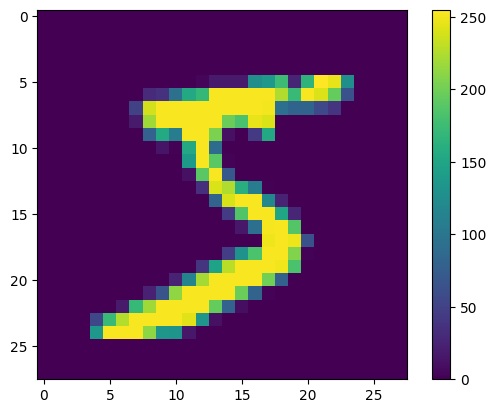

In [168]:
# INSPECT IMAGE 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [170]:
# PRE-PROCESS DATA
train_images = train_images/255
test_images = test_images/255

**Step 4: Build model**

In [171]:
#SET LAYERS OF MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [172]:
# COMPILE MODEL
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**Step 5: Train the model**

In [175]:
#FTI THE MODEL
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.9187
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9214
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2633 - accuracy: 0.9242
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2538 - accuracy: 0.9273
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2440 - accuracy: 0.9300


In [176]:
# EVALUATE MODEL
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2372 - accuracy: 0.9322


[0.2372092455625534, 0.932200014591217]

In [180]:
# PREDICTIONS
predictions = model.predict(test_images)
print(predictions[0])
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[3.2265885e-05 2.2190696e-09 1.1817981e-04 2.2733214e-03 1.3961451e-07
 2.2909961e-05 1.5416343e-10 9.9676293e-01 7.1374866e-06 7.8309485e-04]
7


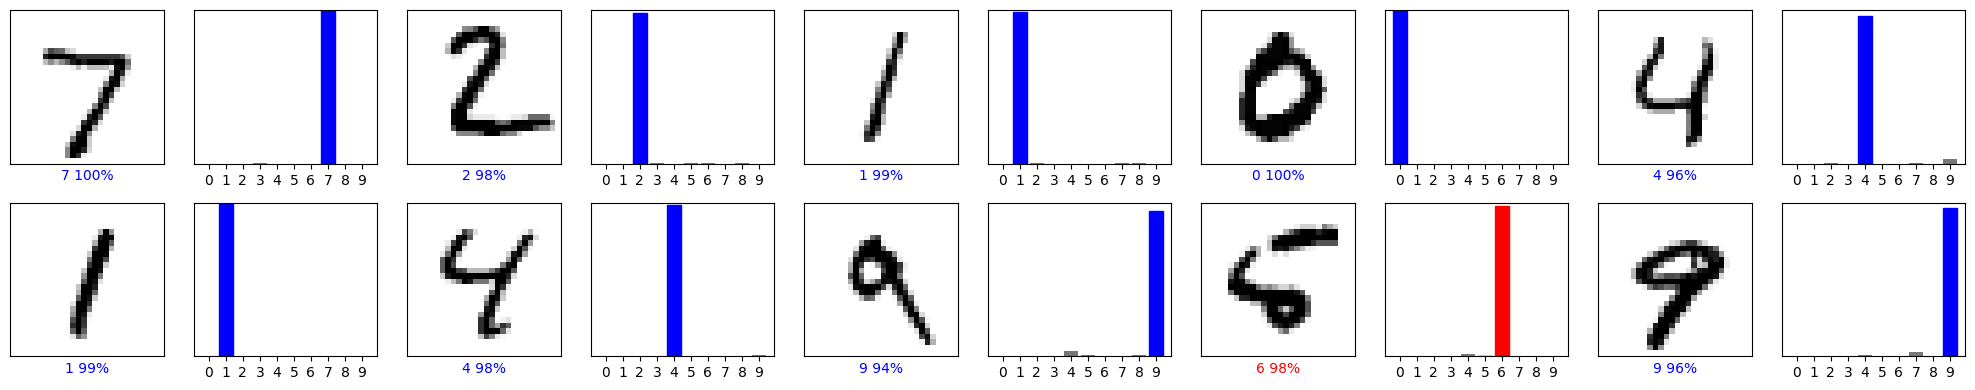

In [184]:
# VISUALIZE PREDICTIONS 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Final results**

The final results of the training section (step 5) show that the model achieved an accuracy of approximately 93% after 5 epochs of training. This means that the model was able to correctly classify 90% of the training data.

The final results are also visualized in the form of a plot of the accuracy and loss of the model during training. The plot shows that the accuracy of the model increases with each epoch, while the loss decreases. This indicates that the model is improving its performance with each iteration.

The code also generates a plot of several test images with their predicted labels and the true labels. This plot allows us to visually inspect how well the model is performing on the test data. The plot shows that the model is able to correctly classify most of the test images, with only a few incorrect classifications.
